In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import os
import collections
import matplotlib as mp
mp.style.use('classic')

# Read simulation files
def datafileread(measurename,skipfirstrows):
    # Reading Datafiles
    path = measurename
    data = np.genfromtxt(path,
                        skip_header=skipfirstrows,
                        delimiter=',',
                        dtype=(float,float),
                        unpack=True)
    return data

# measurement
name = 'total_vin_20V_1u.csv'
a,b,x,vin, v2p5, vc9, v1p0 = datafileread(name,15)
x *= 1e6

# Waveform creation from model chain results

In [2]:
x_model = np.arange(-3, 12, 0.01)
xoff = 45

v1_dc = 8
v2_dc = 1.0
v3_dc = 2.55

# unit: us
v1_width = 1.83
v1_amp = -1.43

#
v2_width = 3.3
v2_amp = -1.24

#
v3_width = 2.7
v3_amp = 1.97



v1_model = [v1_amp if x > 0.1 and x < v1_width else v1_dc for x in x_model]
v2_model = [v2_amp if x > 0.1 and x < v2_width else v2_dc for x in x_model]
v3_model = [v3_amp if x > 0.1 and x < v3_width else v3_dc for x in x_model]
#vclamp_model

x_model += 45

# Comparison reconstructed waveforms with reference

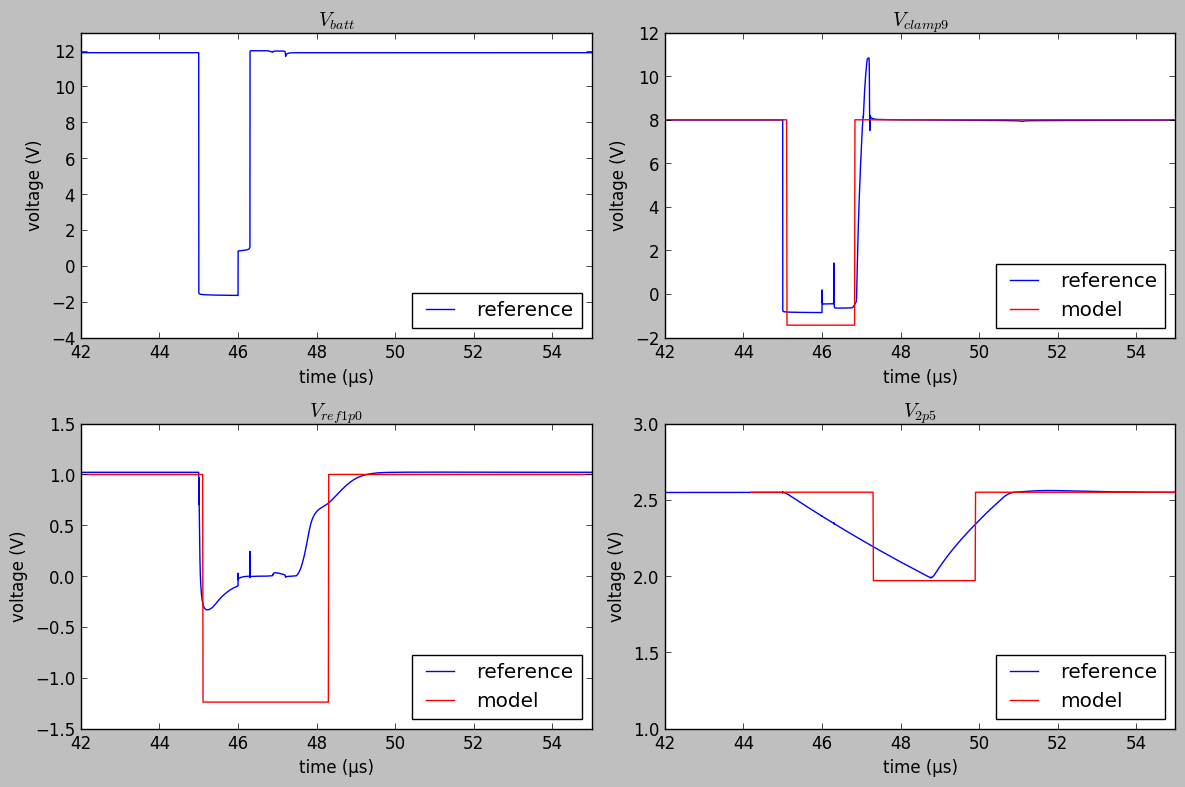

In [3]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(12,8))

xlims = [42, 55]
#
ax1.plot(x,vin, label='reference')
ax1.set_xlim(xlims)
ax1.set_ylim([-4, 13])
ax1.set_title('$V_{batt}$')
ax1.set_xlabel('time (μs)')
ax1.set_ylabel('voltage (V)')
ax1.legend(loc='lower right')
#
ax2.plot(x, vc9, label="reference")
ax2.plot(x_model, v1_model, 'r-', label="model")
ax2.set_xlim(xlims)
ax2.set_title('$V_{clamp9}$')
ax2.set_xlabel('time (μs)')
ax2.set_ylabel('voltage (V)')
ax2.legend(loc='lower right')
#
ax3.plot(x, v1p0, label="reference")
ax3.set_xlim(xlims)
ax3.plot(x_model, v2_model, 'r-', label="model")
ax3.set_title('$V_{ref1p0}$')
ax3.set_xlabel('time (μs)')
ax3.set_ylabel('voltage (V)')
ax3.legend(loc='lower right')
#
ax4.plot(x, v2p5, label="reference")
ax4.plot(x_model + 2.2, v3_model, 'r-', label="model")
ax4.set_xlim(xlims)
ax4.set_ylim([1.0, 3])
ax4.set_title('$V_{2p5}$')
ax4.set_xlabel('time (μs)')
ax4.set_ylabel('voltage (V)')
ax4.legend(loc='lower right')
#
plt.tight_layout()
plt.savefig("../../src/4/figures/total_simulation_20V_1u_V2.png", pad_inches=0.3)
plt.show()